# Sector map for supplementary information

In [1]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore",message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cmocean.cm as cmo

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_formats = ['png']
# %config InlineBackend.figure_formats = ['pdf']

In [3]:
# ds = xr.open_dataset('/home/bbuchovecky/storage/so_predict/esm2m_froelicher/GRID/ocean.static.nc')
ds = xr.open_dataset('/local/projects/so_predict/bbuchovecky/storage/so_predict/esm2m_froelicher/CTRL/SST/sst_0001.nc').isel(time=0)
geolat_t = ds.geolat_t
geolon_t = ds.geolon_t
sst = ds.sst

FileNotFoundError: [Errno 2] No such file or directory: b'/local/projects/so_predict/bbuchovecky/storage/so_predict/esm2m_froelicher/CTRL/SST/sst_0001.nc'

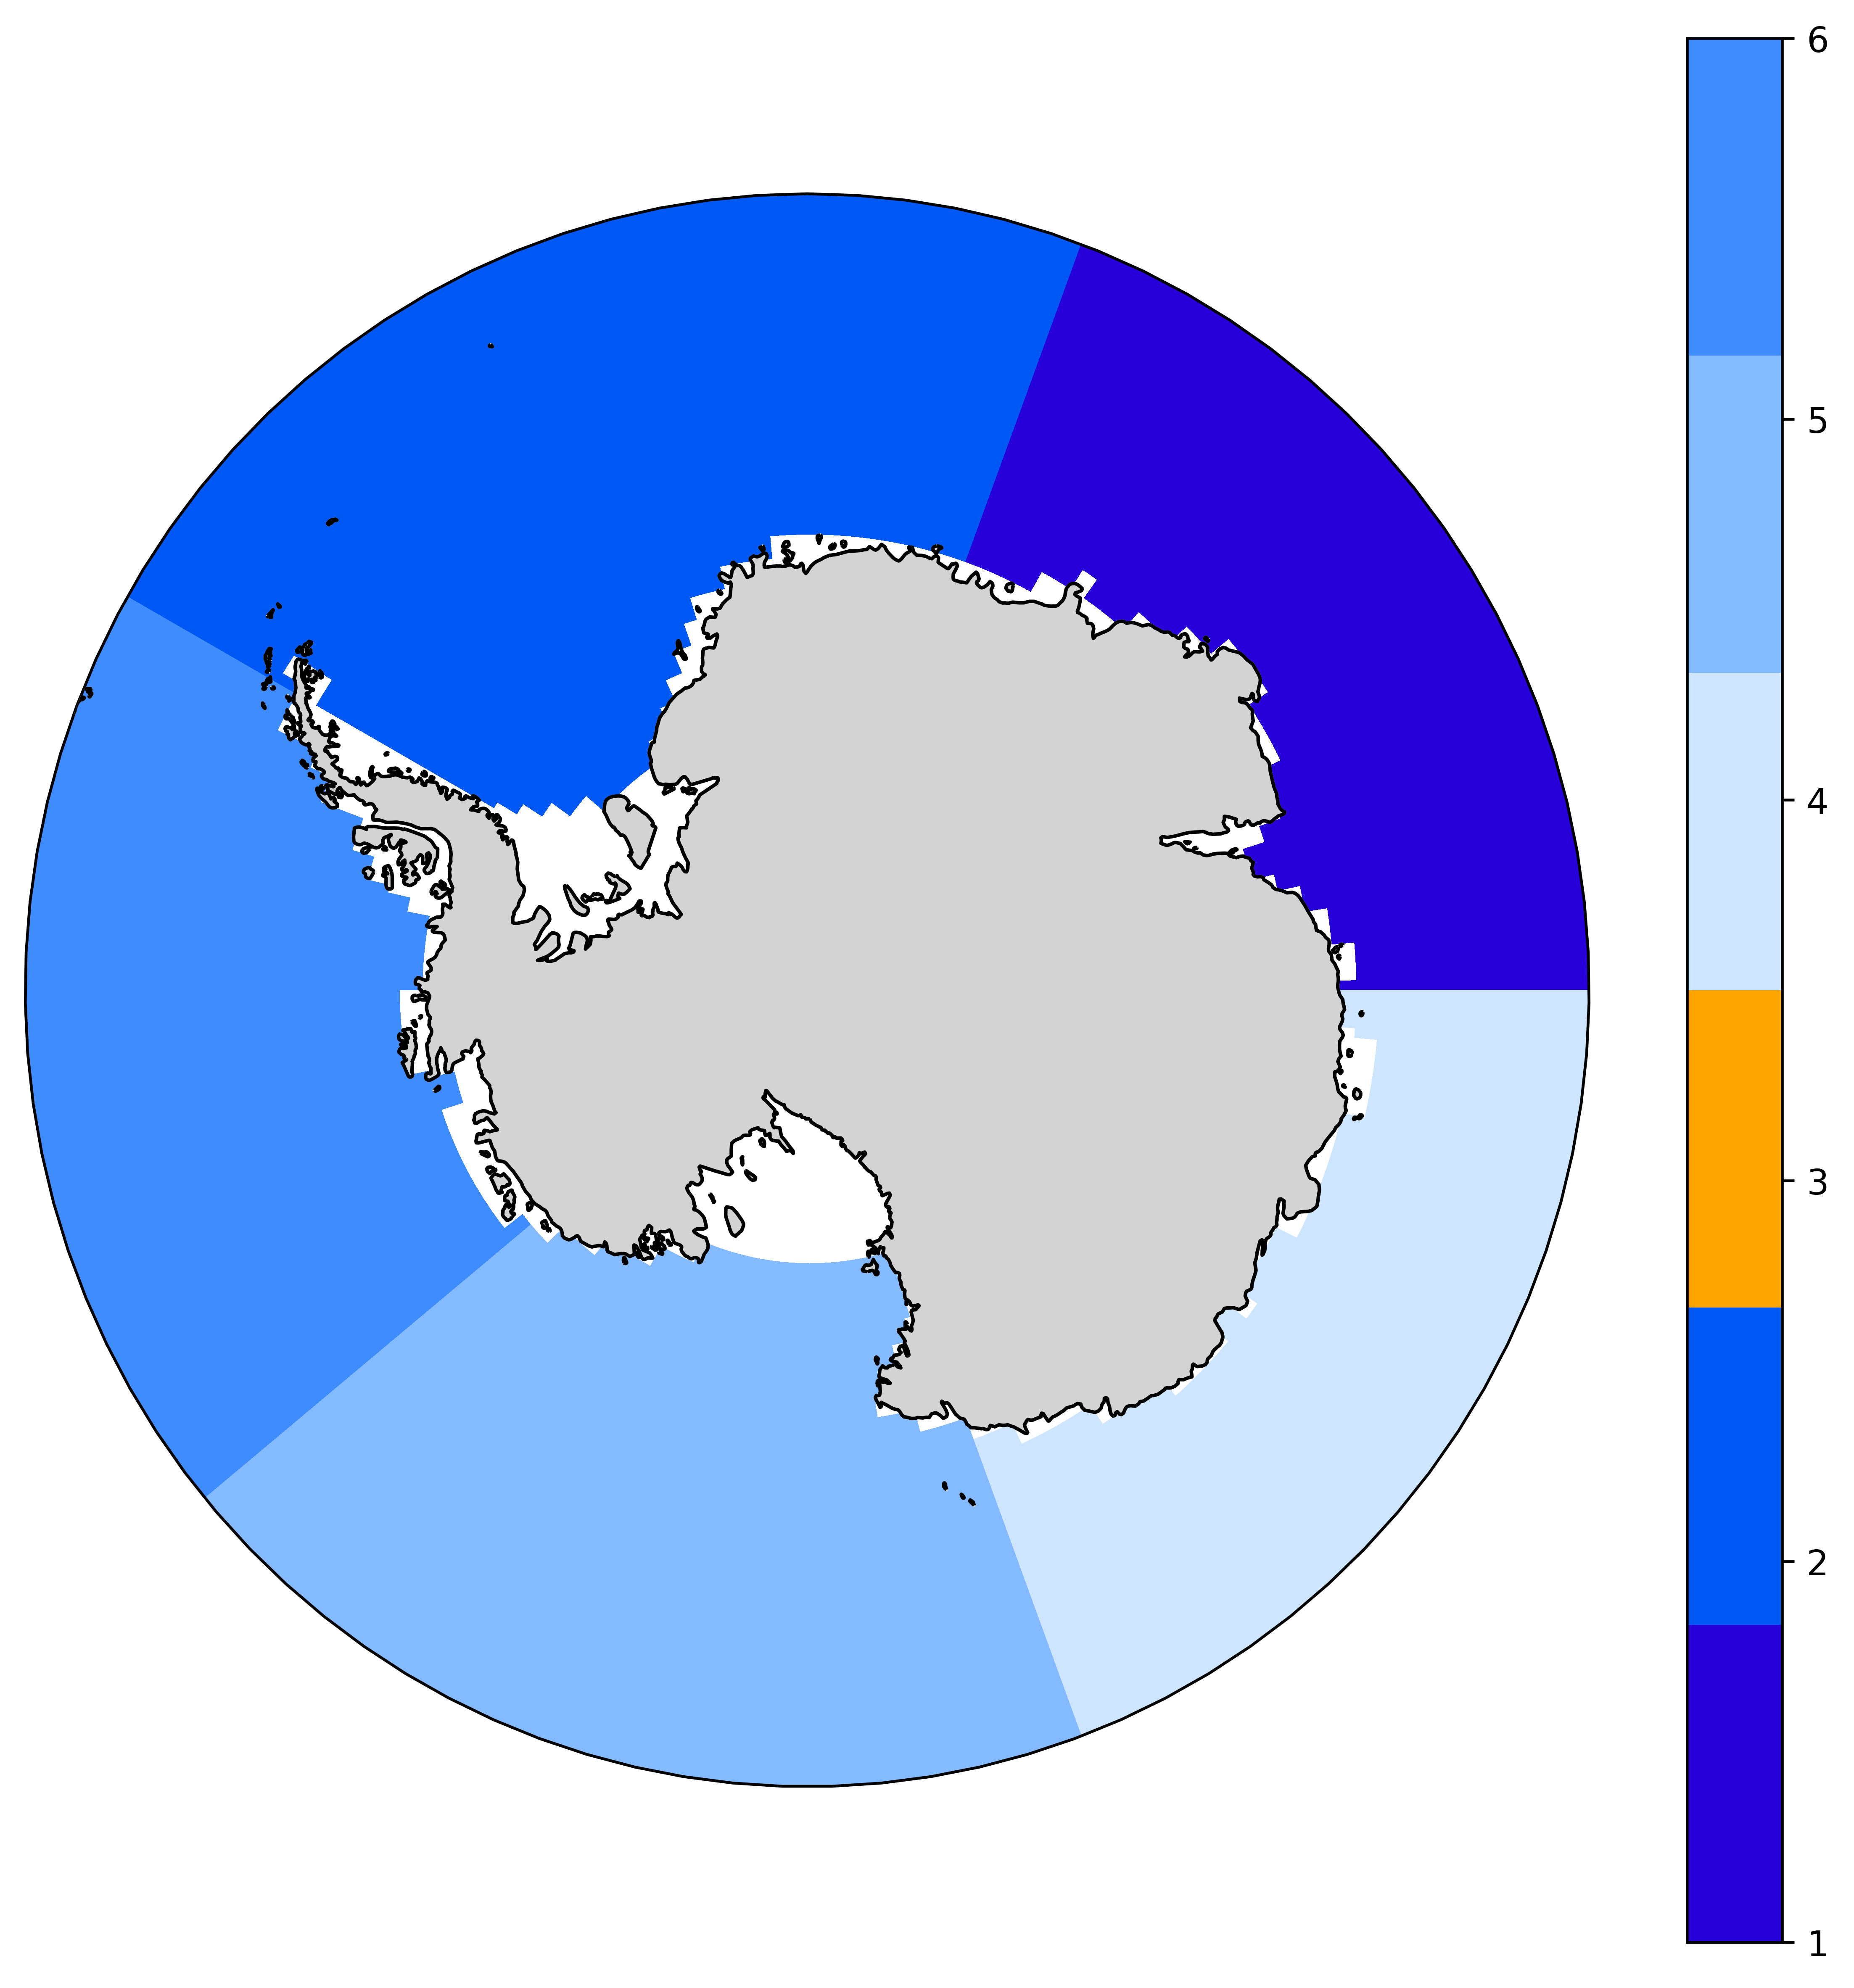

In [144]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.AzimuthalEquidistant(central_latitude=-90)})

lat_extent = slice(-91, -55)
trimmed = sst.sel(yt_ocean=lat_extent)

ones = np.ones(shape=trimmed.shape)
nan = np.ones(shape=trimmed.shape) * np.nan;
where_ones = np.where(~np.isnan(trimmed), ones, nan)

wed_ones = np.where((trimmed.xt_ocean>-60) & (trimmed.xt_ocean<20), where_ones+1, where_ones)
ind_ones = np.where((trimmed.xt_ocean>20) & (trimmed.xt_ocean<-270), wed_ones+2, wed_ones)
wpa_ones = np.where((trimmed.xt_ocean>-270) & (trimmed.xt_ocean<-200), ind_ones+3, ind_ones)
ros_ones = np.where((trimmed.xt_ocean>-200) & (trimmed.xt_ocean<-130), wpa_ones+4, wpa_ones)
all_ones = np.where((trimmed.xt_ocean>-130) & (trimmed.xt_ocean<-60), ros_ones+5, ros_ones)

# 
# cmap = ListedColormap(["#2700da", "#5643e8", "orange", "#c1beff", "#9e96fa", "#7b6df2"])
cmap = ListedColormap(["#2700da", "#0059f4", "orange", "#cde5ff", "#84baff", "#3f8cff"])

data, lon = add_cyclic_point(all_ones, coord=area_t.geolon_t[0])
cf = ax.pcolormesh(lon, sst.yt_ocean.sel(yt_ocean=lat_extent), data,
                   cmap=cmap, edgecolors='None',
                   transform=ccrs.PlateCarree())

cb = fig.colorbar(cf)

# from `always_circular_stereo example` on cartopy website
# https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_extent((-180.0, 180.0, -90, -55), crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines(linewidth=1, zorder=100)
# gl = ax.gridlines(linewidth=0.75, linestyle='--')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.add_feature(cartopy.feature.LAND, color='lightgray', zorder=99)

# ax[0].text(-90, 70, 'TCR', fontsize=16, rotation='vertical', va='center', ha='center', transform=ccrs.PlateCarree())
# ax[3].text(-90, 70, 'T140', fontsize=16, rotation='vertical', va='center', ha='center', transform=ccrs.PlateCarree())
